Thought :-

1. I have multiple data points (2 axes- x and y)
2. I need to plot a regression line y = mx+b
3. What do I need to do in terms of MLE such that I choose a right m and b such that the distance between the y and yhat is reduced/MINIMISED (think in terms of distance formula?)

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

In [82]:
df = pd.read_csv("Windmill1.csv")
x = df["Wind"]
y = df["Power"]

In [83]:
para = [0,0] #[m, b] of y = mx+b
# initialisation of parameters
iterations = 100
np.random.seed(100)
mValues = np.empty(iterations)
bValues = np.empty(iterations)

for i in range (iterations):
    ind1 = np.random.randint(0, len(x)-1)
    ind2 = np.random.randint(0, len(x)-1)
    bEl = np.random.randint(1, 100)
    mEl = (x[ind2]-x[ind1])/(y[ind2] - y[ind1])
    mValues[i] = mEl
    bValues[i] = bEl

print (mValues)

[ 0.42297952  0.70464071  1.85761425  0.30238498  0.44355179  0.57723918
  0.23367989  0.50787808  0.51147206  1.01667496  0.46422987  0.4384371
  0.40546955  0.41930085  0.3945881   0.43724489  6.81831249  0.34833303
  0.35697142  0.3763755   0.36307847  0.39331468  1.16948222  0.45207256
  0.3560593   0.27251054  0.54428985  0.39473157  0.41706502  0.41886951
  0.32562575  2.00552173  0.42106098  0.4185454   0.42085542  0.2407879
  0.50802303  0.65247534  0.42527107  0.41131297  0.48580282  2.0201586
  0.52956328  0.4379964   0.44657407  0.55859795  0.82244955  0.62257764
  0.39962398  1.96959944  0.38146913  0.39901797  0.37185876  0.54555084
  0.37382113  0.46159072  0.22622586  0.45679413  0.64446018  0.34196104
  0.455313    1.88342781  0.34209036  0.33133404  0.47365524  0.48569128
 -0.01298302  0.85743922  0.02303702  0.46271651  0.52571467  0.36918879
  0.35603917  0.16176156  0.40787647 11.53704284  0.39722712  0.46952984
  1.13301689  0.38207367  0.65987246  0.57191454  0.30

In [84]:
Errors = np.empty(len(x))

In [85]:
def logLikelihood(para, Errors):
    m = para[0]
    c = para[1]
    yhat = (m*x)+c
    Errors = np.sum(np.square(yhat-y))
    return Errors

In [86]:
def cons(f):
    return f

con = {'type': 'ineq', 'fun':cons}
minimize(logLikelihood, para, args=((x,y), ), constraints=con)

     fun: 4038.468306449188
     jac: array([  0.       , 918.1265564])
 message: 'Optimization terminated successfully'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 1.53120057e+00, -1.99641069e-11])

In [87]:
#ypred = (1.55*x)+

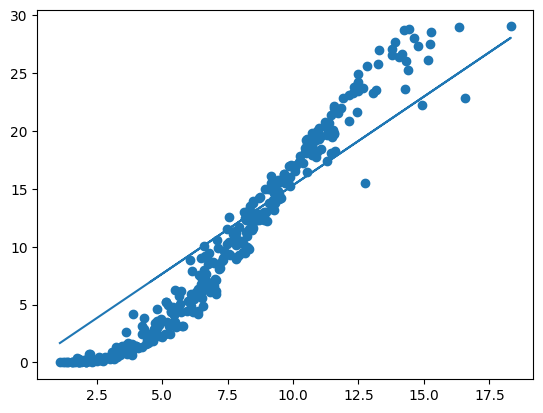

In [88]:
ypred = (1.53120057e+00*x)+(-1.99641069e-11)
plt.scatter(x, y)
plt.plot(x, ypred)